In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy

In [2]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
pubs_author_funder=pubs_author_funder[pubs_author_funder.funder_country.notnull()]
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[France, United States]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
7739777,65301283,"[Germany, Netherlands, Netherlands, Netherland...","[EU, Netherlands, Netherlands, Netherlands, Ne...",61,2016,0.000,0
7739778,65301284,"[Canada, Canada, Turkey]","[Canada, Turkey]",61,2016,0.000,0
7739779,65301319,[China],[China],14,2018,2.081,2
7739780,65301320,"[Russia, Russia, Ukraine, United Kingdom]",[United Kingdom],28,2017,0.000,0


In [14]:
from itertools import combinations
import collections

In [20]:
collections.Counter(a)[3]

1

In [26]:
a=[1]
for item in combinations(a,2):
    print("hello")

In [30]:
fund_either=[]
fund_both=[]
for index, row in pubs_author_funder.iterrows():
    funderlist=row['funder_country']
    if funderlist==0:
        funderlist=[]
    funderoccurence=collections.Counter(funderlist)
    authorlist=row['author_country']
    authoroccurence=collections.Counter(authorlist)
    authorlist.sort()
    authorcomb=combinations(authorlist,2)
    for cntry_a,cntry_b in set(authorcomb):
        if (cntry_a in funderlist) and (cntry_b in funderlist):
            #count the number of institution in cntry_a/b
            aut_num_a=authoroccurence[cntry_a]
            aut_num_b=authoroccurence[cntry_b]
            #count the number of funding units provide by a/b
            unit_num_a=funderoccurence[cntry_a]
            unit_num_b=funderoccurence[cntry_b]
            #number of funding unit per institution
            unit_ins_a=unit_num_a/aut_num_a
            unit_ins_b=unit_num_b/aut_num_b
            
            
            fund_both.append([cntry_a,cntry_b,unit_ins_a])
            fund_both.append([cntry_b,cntry_a,unit_ins_b])
            if (cntry_a == cntry_b):
                fund_either.append([cntry_a,cntry_b,unit_ins_a])
        elif (cntry_a in funderlist) and (cntry_b not in funderlist):
            #count the number of institution in cntry_a/b
            aut_num_a=authoroccurence[cntry_a]
            #count the number of funding units provide by a/b
            unit_num_a=funderoccurence[cntry_a]
            #number of funding unit per institution
            unit_ins_a=unit_num_a/aut_num_a
            fund_either.append([cntry_a, cntry_b, unit_ins_a])
        elif (cntry_a not in funderlist) and (cntry_b in funderlist):
            #count the number of institution in cntry_a/b
            aut_num_b=authoroccurence[cntry_b]
            #count the number of funding units provide by a/b
            unit_num_b=funderoccurence[cntry_b]
            #number of funding unit per institution
            unit_ins_b=unit_num_b/aut_num_b
            
            
            fund_either.append([cntry_b, cntry_a, unit_ins_b])
        

In [33]:
def list2df(resultlist):
    df=pd.DataFrame(resultlist)
    df.columns=['source','target','rel_unit']
    df=df.groupby(['source','target'])['rel_unit'].mean().reset_index()
    df=df.pivot(
    index="source",columns='target',values='rel_unit').fillna(0)
    return df

In [34]:
both_df=list2df(fund_both)

In [37]:
cntry_cntry_df = pd.read_csv("..//..//..//data//Data//DerivedData//Derived//funding_source_target.csv")
cntry_cntry_df = cntry_cntry_df.pivot_table(
    index='source',columns='target', values='value', fill_value=0)
cntry_cntry_df.head()

target,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
source,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.333333,...,2.299242,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,0.0,0.0
Albania,0.0,8.833333,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.277778,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.0,0.0
Algeria,0.0,0.000000,1706.342726,0.0,0.000000,0.0,0.0,3.92619,0.0,1.997885,...,21.937491,0.0,0.0,0.0,0.0,0.0,0.25,0.333333,0.0,0.0
Andorra,0.0,0.000000,0.000000,3.5,0.000000,0.0,0.0,0.00000,0.0,0.000000,...,3.900000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0
Angola,0.0,0.000000,0.000000,0.0,20.581349,0.0,0.0,0.00000,0.0,2.650000,...,3.602381,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0


In [38]:
cntry_out = cntry_cntry_df.sum(axis=1).reset_index()
cntry_out.columns=['country','unit_out']
cntry_out=cntry_out.sort_values(by="unit_out", ascending=False)
cntry_out=cntry_out[cntry_out.country!="EU"]
top20_df=cntry_out.head(20)
cntry_top20=top20_df.country

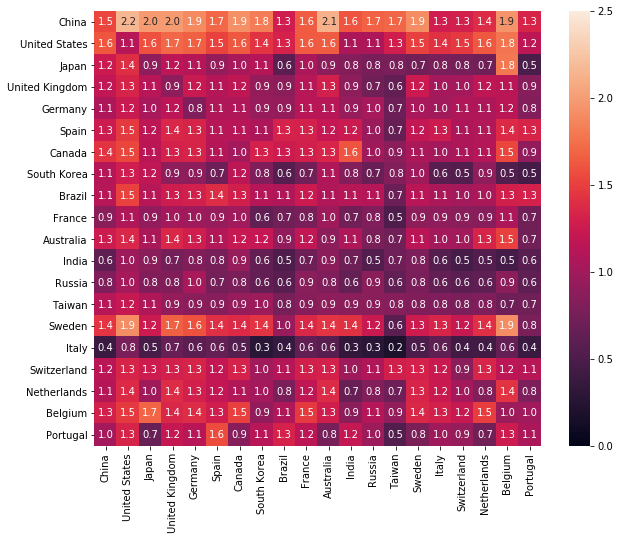

In [44]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    both_df.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20,vmin=0,vmax=2.5)
plt.savefig("both_per_unit.pdf", format="pdf",bbox_inches="tight")

In [40]:
either_df=list2df(fund_either)

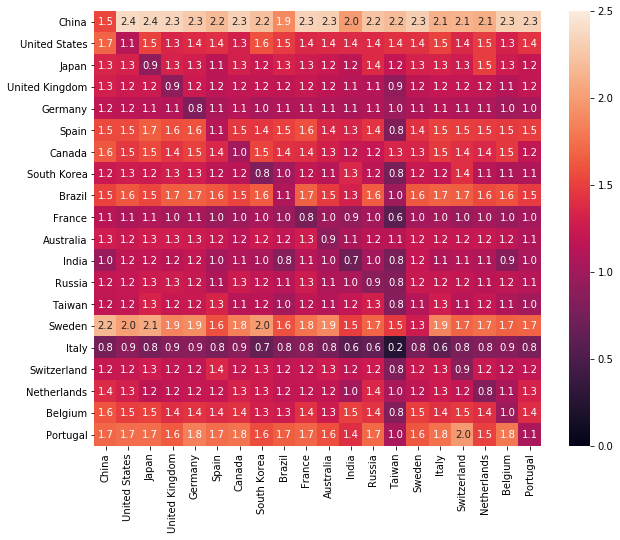

In [45]:
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(
    either_df.loc[cntry_top20, cntry_top20].values, annot=True,
    fmt=".1f",xticklabels=cntry_top20, yticklabels=cntry_top20,vmin=0,vmax=2.5)
plt.savefig("either_per_unit.pdf", format="pdf",bbox_inches="tight")